In [1]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 10.0 MB/s eta 0:00:00


In [2]:
pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=a4c132246c8864989191b38712a24542a1ad60ad802f1d0ca5ab697f03f8e1a9
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [3]:
pip install graphviz

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np                               # Import numpy
from skimage import data, io   # Import skimage library (data - Test images and example data.
#                          io - Reading, saving, and displaying images.)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)
%matplotlib inline
import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import cv2 as cv
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
#from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from PIL import Image
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_set= '/content/drive/MyDrive/PhDProject/colon_image_sets'

In [ ]:
for i,d in enumerate([image_set]):
    filepaths=[]
    labels=[]
    classlist=os.listdir(d)
    for klass in classlist:
        classpath=os.path.join(d,klass)
        if os.path.isdir(classpath):
            flist=os.listdir(classpath)
            for f in flist:
                fpath=os.path.join(classpath,f)
                filepaths.append(fpath)
                labels.append(klass)
    Fseries= pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    lung_df=pd.concat([Fseries, Lseries], axis=1)
df=pd.concat([lung_df], axis =0).reset_index(drop=True)# make a combined dataframe

print(df['labels'].value_counts())

colon_normal            5000
colon_adenocarcinoma    5000
Name: labels, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_split=.5
test_split=.25
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), ' _test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

NameError: name 'df' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
height=224
width=224
channels=3
batch_size=32
img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img/127.5-1  # scale pixel between -1 and +1
gen=ImageDataGenerator(preprocessing_function=scalar)
train_set=gen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_set=gen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
validate_set=gen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
#classes=list(train_gen.class_indices.keys())
#class_count=len(classes)

NameError: name 'test_df' is not defined

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE

Tensorflow version 2.15.0


In [ ]:
try: # detect TPUs
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
  strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
  strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
  #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

Number of accelerators:  1


tpu detection

In [ ]:
with strategy.scope(): # this line is all that is needed to run on TPU (or multi-GPU, ...)

  bnmomemtum=0.9
  def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
  #  y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
  #  y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
  #  y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

  def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)

  x = tf.keras.layers.Input(shape=[*IMAGE_SIZE, 3]) # input is 192x192 pixels RGB

  y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
 # y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
  y = fire_module(24, 48)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(48, 96)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(64, 128)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(48, 96)(y)
  y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
  y = fire_module(24, 48)(y)
  y = tf.keras.layers.GlobalAveragePooling2D()(y)
  y = tf.keras.layers.Dense(2, activation='softmax')(y)

  model = tf.keras.Model(x, y)

  model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

  model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 24)         792       ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 224, 224, 24)         600       ['conv2d_1[0][0]']            
                                                                                              

In [ ]:
from google.colab import files
uploaded = files.upload() #upload arial.ttf

Saving ArialCE.ttf to ArialCE.ttf


In [ ]:
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#b47eb3'
color_map[layers.MaxPooling2D]['fill'] = '#462255'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#12674a'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
color_map[layers.Concatenate]['fill'] = '#a7c2cc'
color_map[layers.InputLayer]['fill'] = '#bf5700'
color_map[layers.GlobalAveragePooling2D]['fill'] = '#fef250'
#visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)

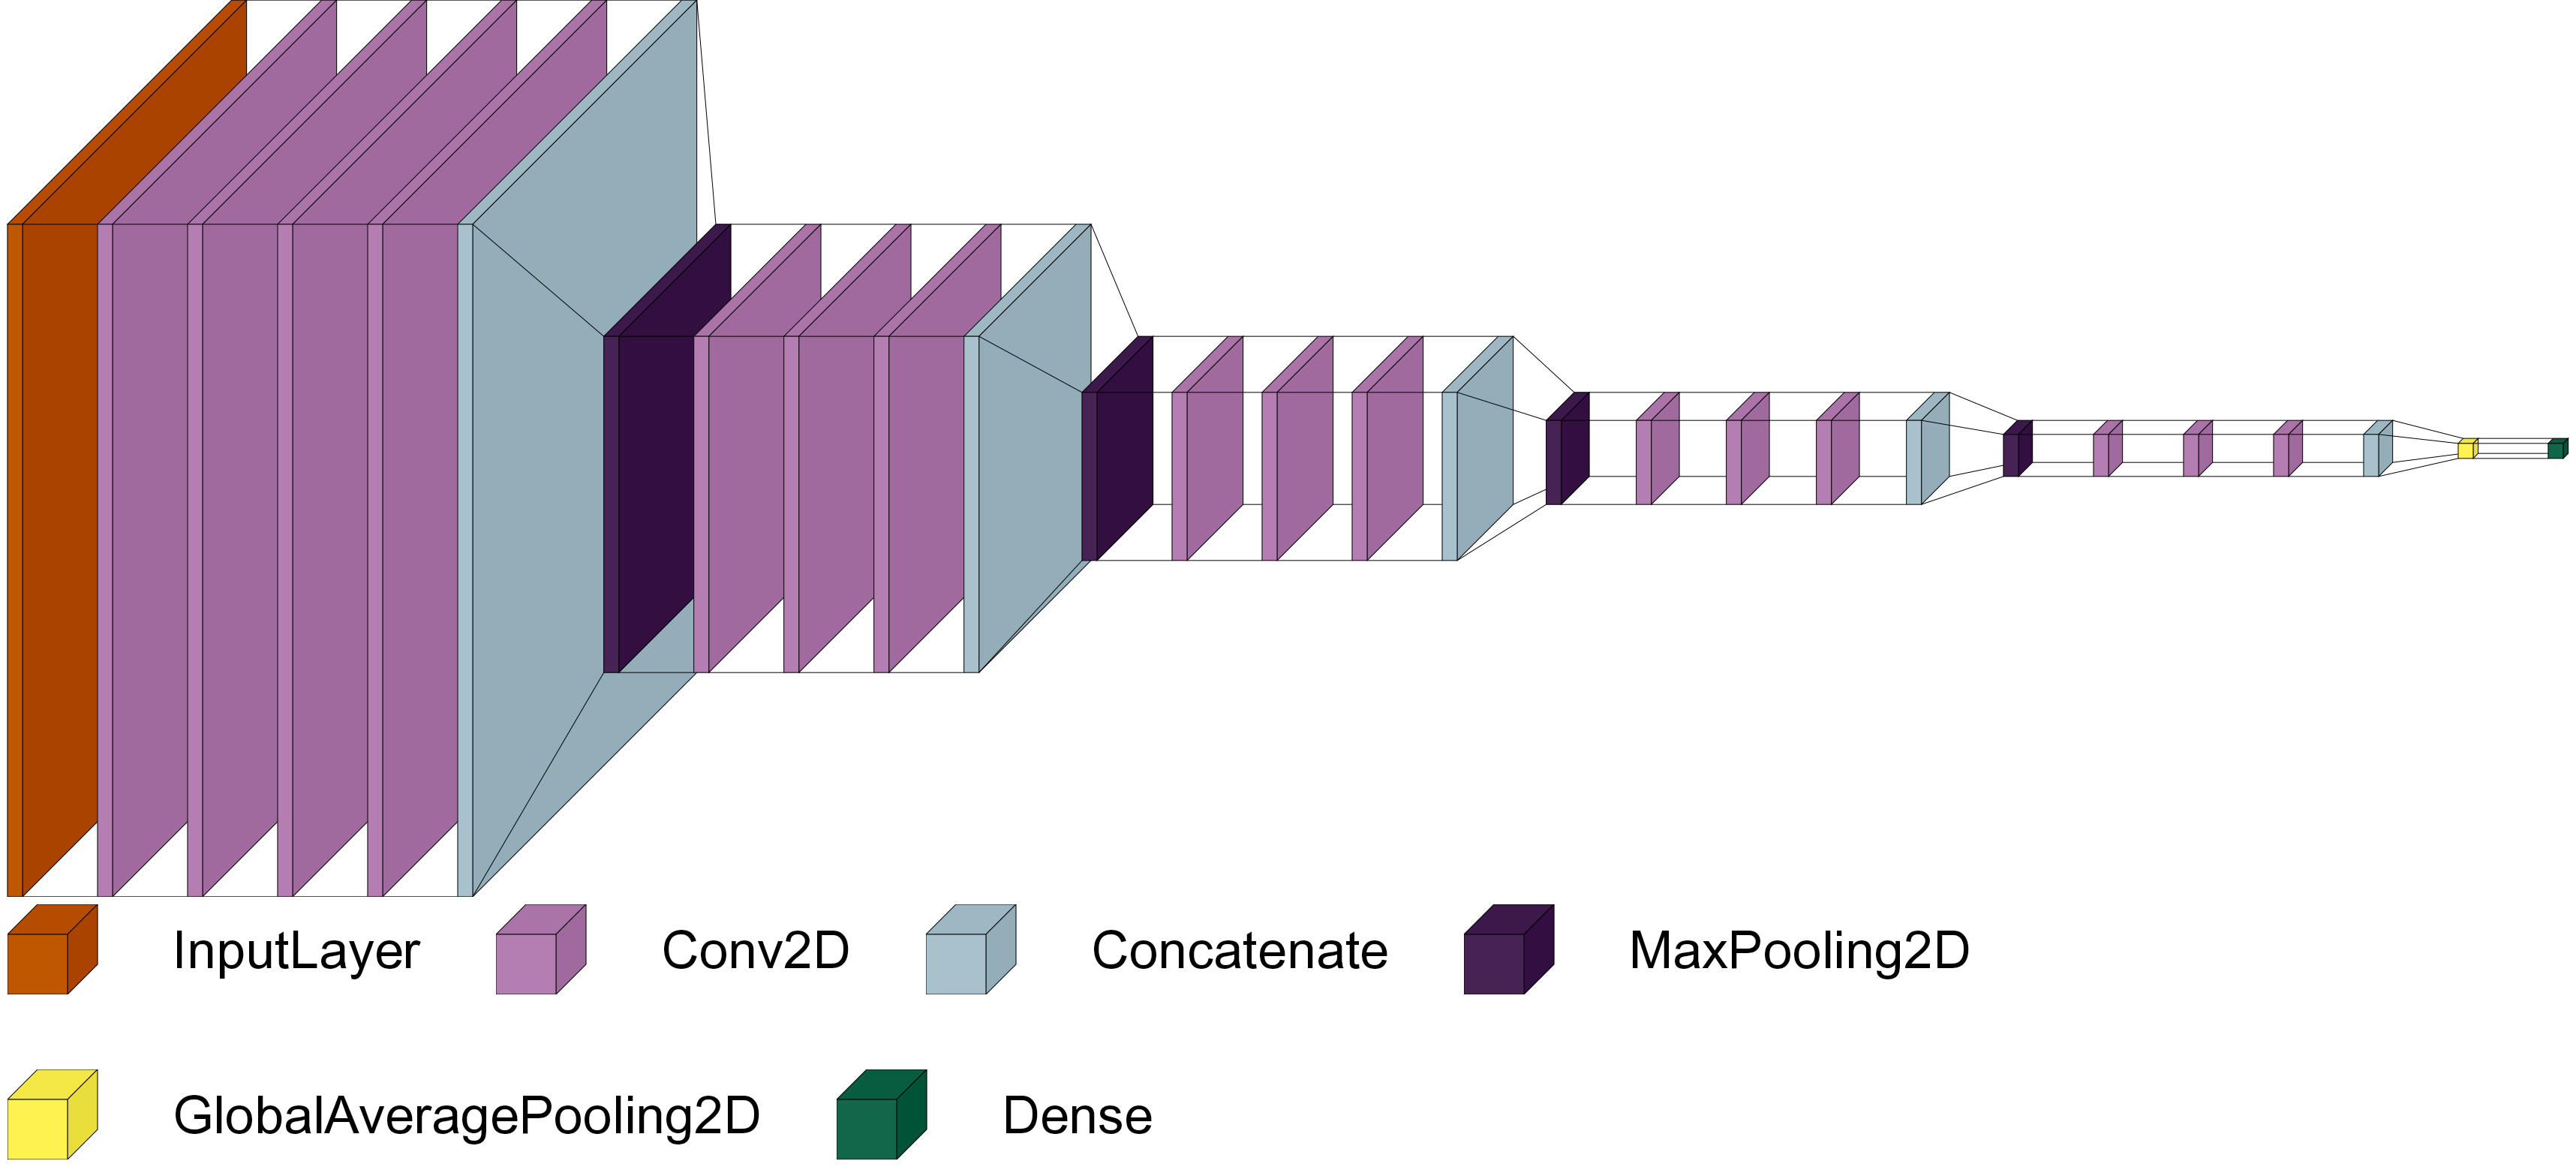

In [ ]:
import visualkeras
from PIL import ImageFont

# font = ImageFont.load_default()
font = ImageFont.truetype("ArialCE.ttf", 70)  # using comic sans is strictly prohibited!
figure_size = (10, 6)

visualkeras.layered_view(model, legend=True,  spacing=100, font=font,color_map=color_map)



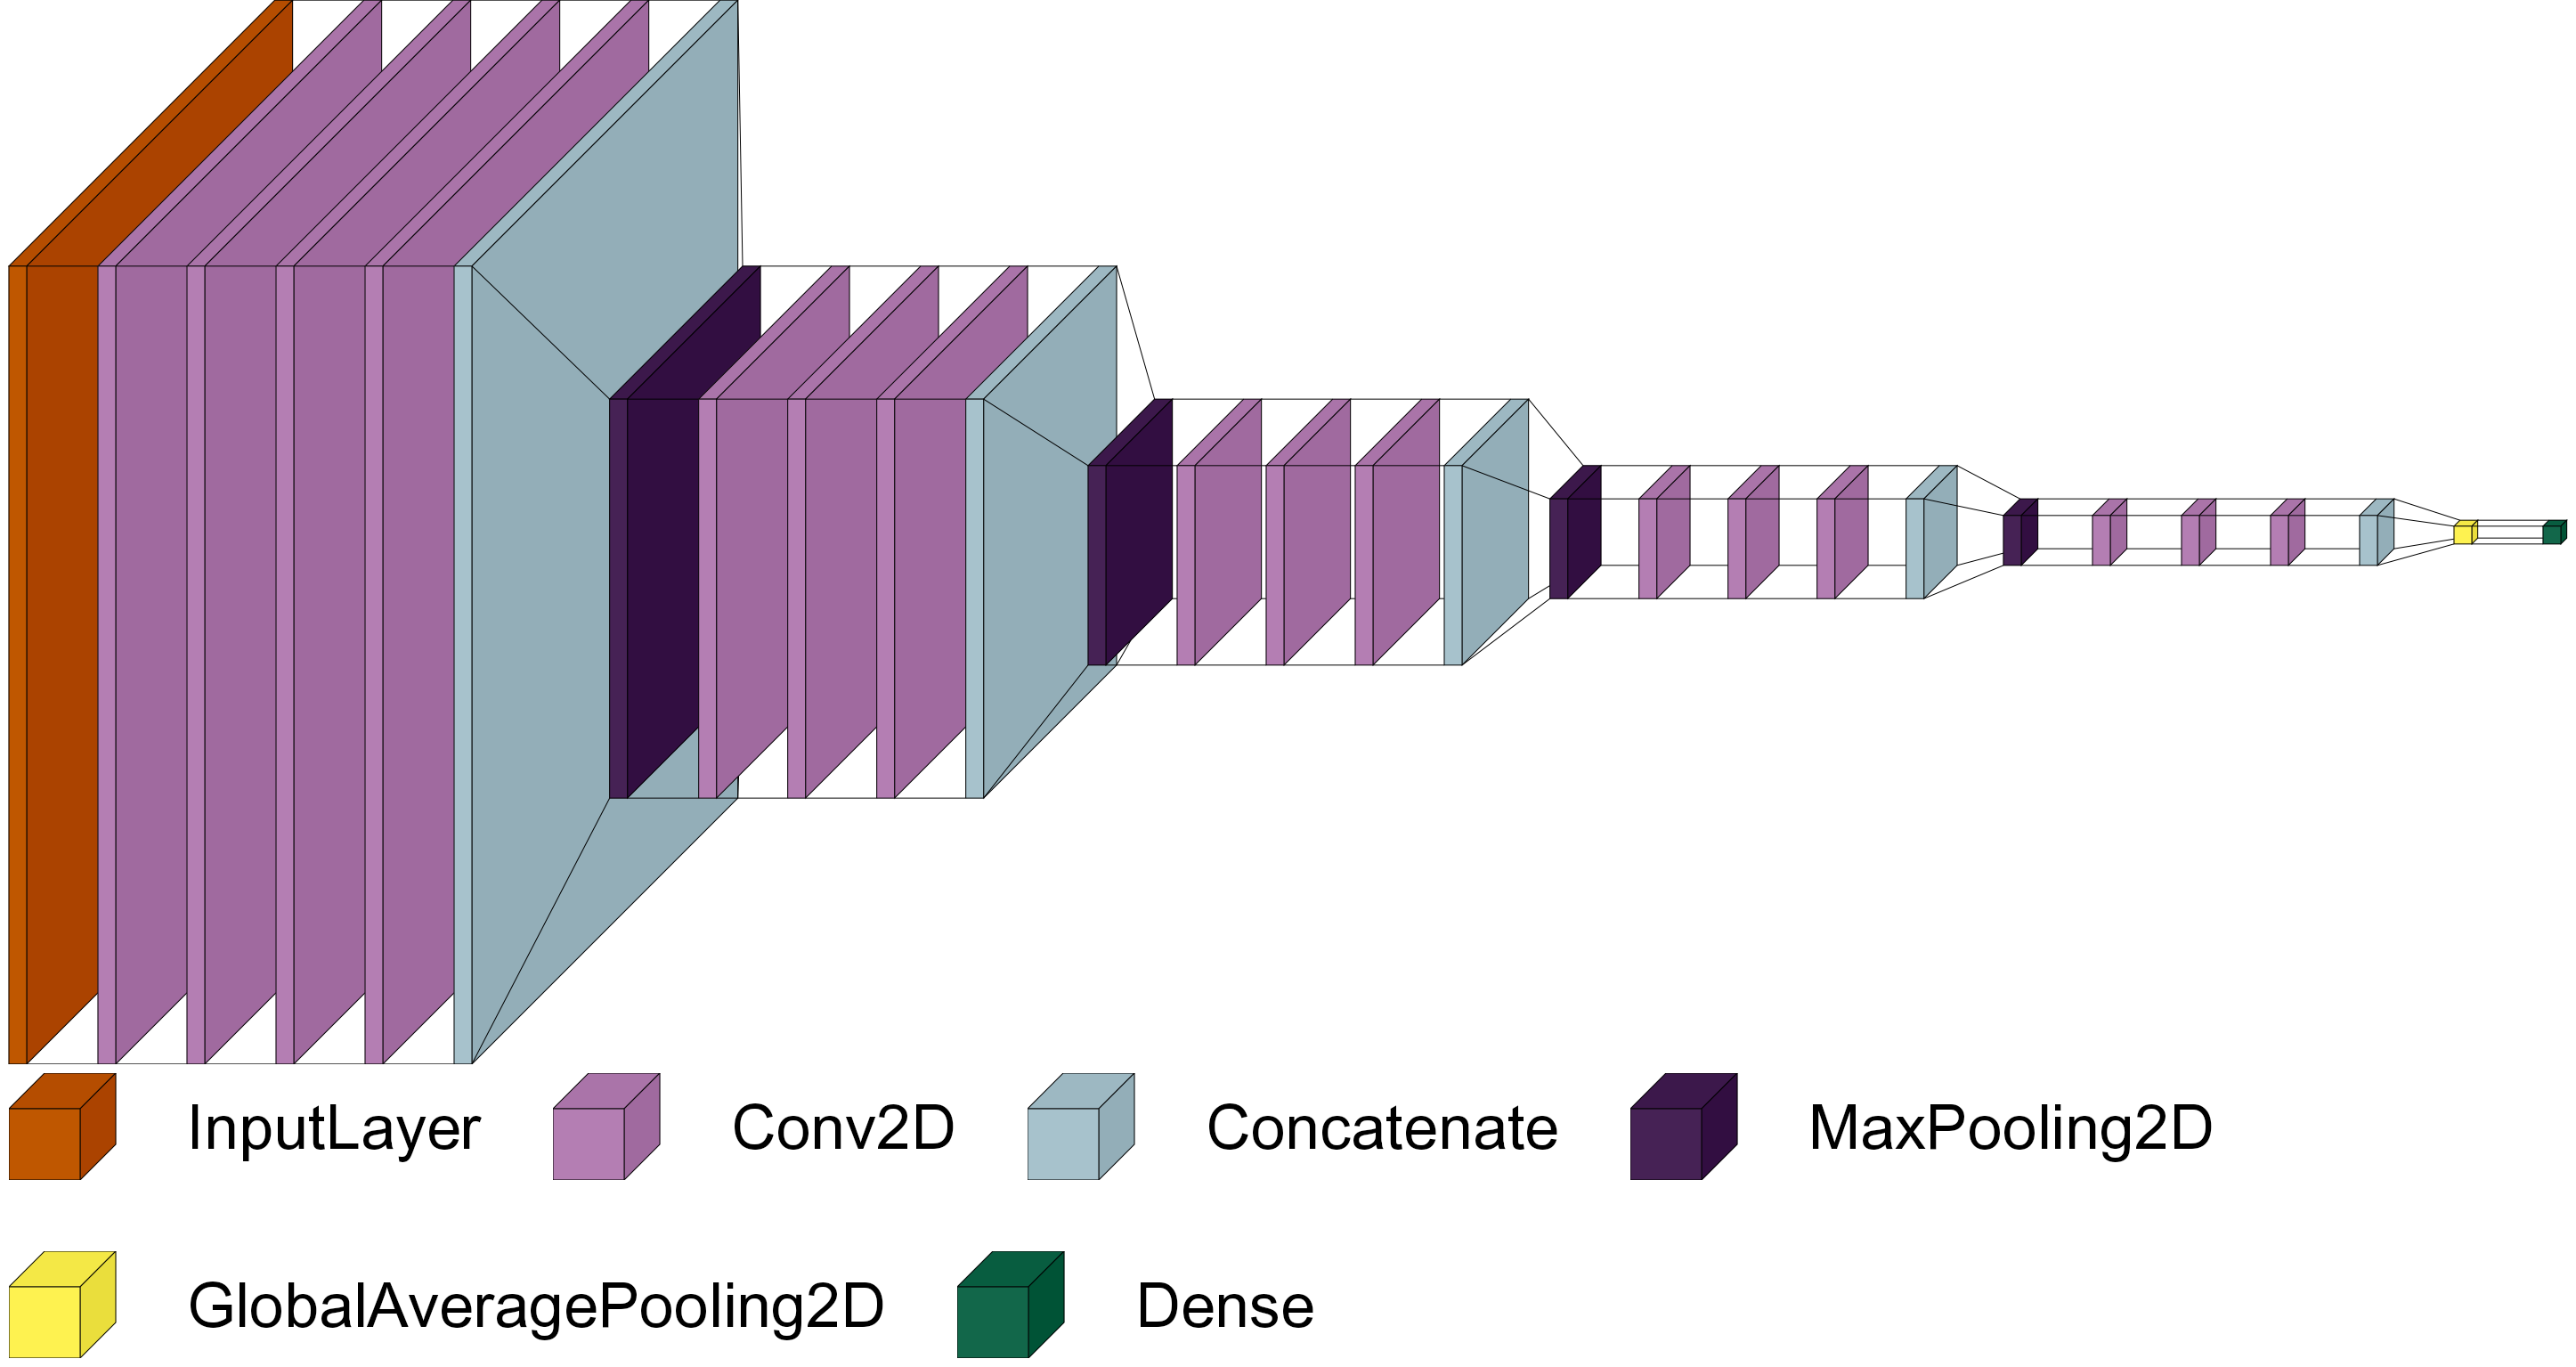

In [ ]:
import visualkeras
from PIL import ImageFont

# font = ImageFont.load_default()
font = ImageFont.truetype("ArialCE.ttf", 70)  # using comic sans is strictly prohibited!
figure_size = (10, 6)

visualkeras.layered_view(model, legend=True,  spacing=80, font=font,color_map=color_map)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, GlobalAveragePooling2D, Input, Concatenate, Add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

def fire_module(x, squeeze_filters, expand1x1_filters, expand3x3_filters, dilation_rate=1):
    squeeze = Conv2D(filters=squeeze_filters, kernel_size=(1, 1), activation='relu')(x)

    expand1x1 = Conv2D(filters=expand1x1_filters, kernel_size=(1, 1), activation='relu')(squeeze)
    expand3x3 = Conv2D(filters=expand3x3_filters, kernel_size=(3, 3), activation='relu', dilation_rate=dilation_rate, padding='same')(squeeze)

    return Concatenate()([expand1x1, expand3x3])

def create_squeezenet_dilated_residual(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='valid')(input_tensor)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # First Residual Block
    residual = fire_module(x, 16, 64, 64, dilation_rate=2)
    residual = Conv2D(64, (1, 1), activation='relu')(residual)
    x = fire_module(x, 16, 64, 64, dilation_rate=2)
    x = Conv2D(64, (1, 1), activation='relu')(x)
    x = Add()([x, residual])

    x = MaxPooling2D(pool_size=(2, 2))(x)

    # # Second Residual Block
    residual = fire_module(x, 32, 128, 128, dilation_rate=3)
    residual = Conv2D(128, (1, 1), activation='relu')(residual)
    x = fire_module(x, 32, 128, 128, dilation_rate=3)
    x = Conv2D(128, (1, 1), activation='relu')(x)
    x = Add()([x, residual])

    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Third Residual Block
    residual = fire_module(x, 48, 192, 192, dilation_rate=2)
    residual = Conv2D(192, (1, 1), activation='relu')(residual)
    x = fire_module(x, 48, 192, 192, dilation_rate=2)
    residual = fire_module(x, 48, 192, 192)
    residual = Conv2D(192, (1, 1), activation='relu')(residual)
    x = fire_module(x, 48, 192, 192)
    x = Conv2D(192, (1, 1), activation='relu')(x)
    x = Add()([x, residual])

    x = GlobalAveragePooling2D()(x)

    output = Dense(num_classes, activation='softmax')(x)

    model1 = Model(inputs=input_tensor, outputs=output)
    return model1

# Rest of the code remains unchanged

In [ ]:
input_shape = (224, 224, 3)  # Adapt the input shape according to your data
num_classes =  2 # Replace this with the number of classes in your specific classification task

model1 = create_squeezenet_dilated_residual(input_shape, num_classes)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 222, 222, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)         0         ['conv2d_16[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 111, 111, 16)         1040      ['max_pooling2d_4[0][0]'

In [ ]:
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#b47eb3'
color_map[layers.MaxPooling2D]['fill'] = '#462255'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#12674a'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
color_map[layers.Concatenate]['fill'] = '#a7c2cc'
color_map[layers.InputLayer]['fill'] = '#bf5700'
color_map[layers.GlobalAveragePooling2D]['fill'] = '#fef250'
color_map[layers.Add]['fill'] = '#e30022'

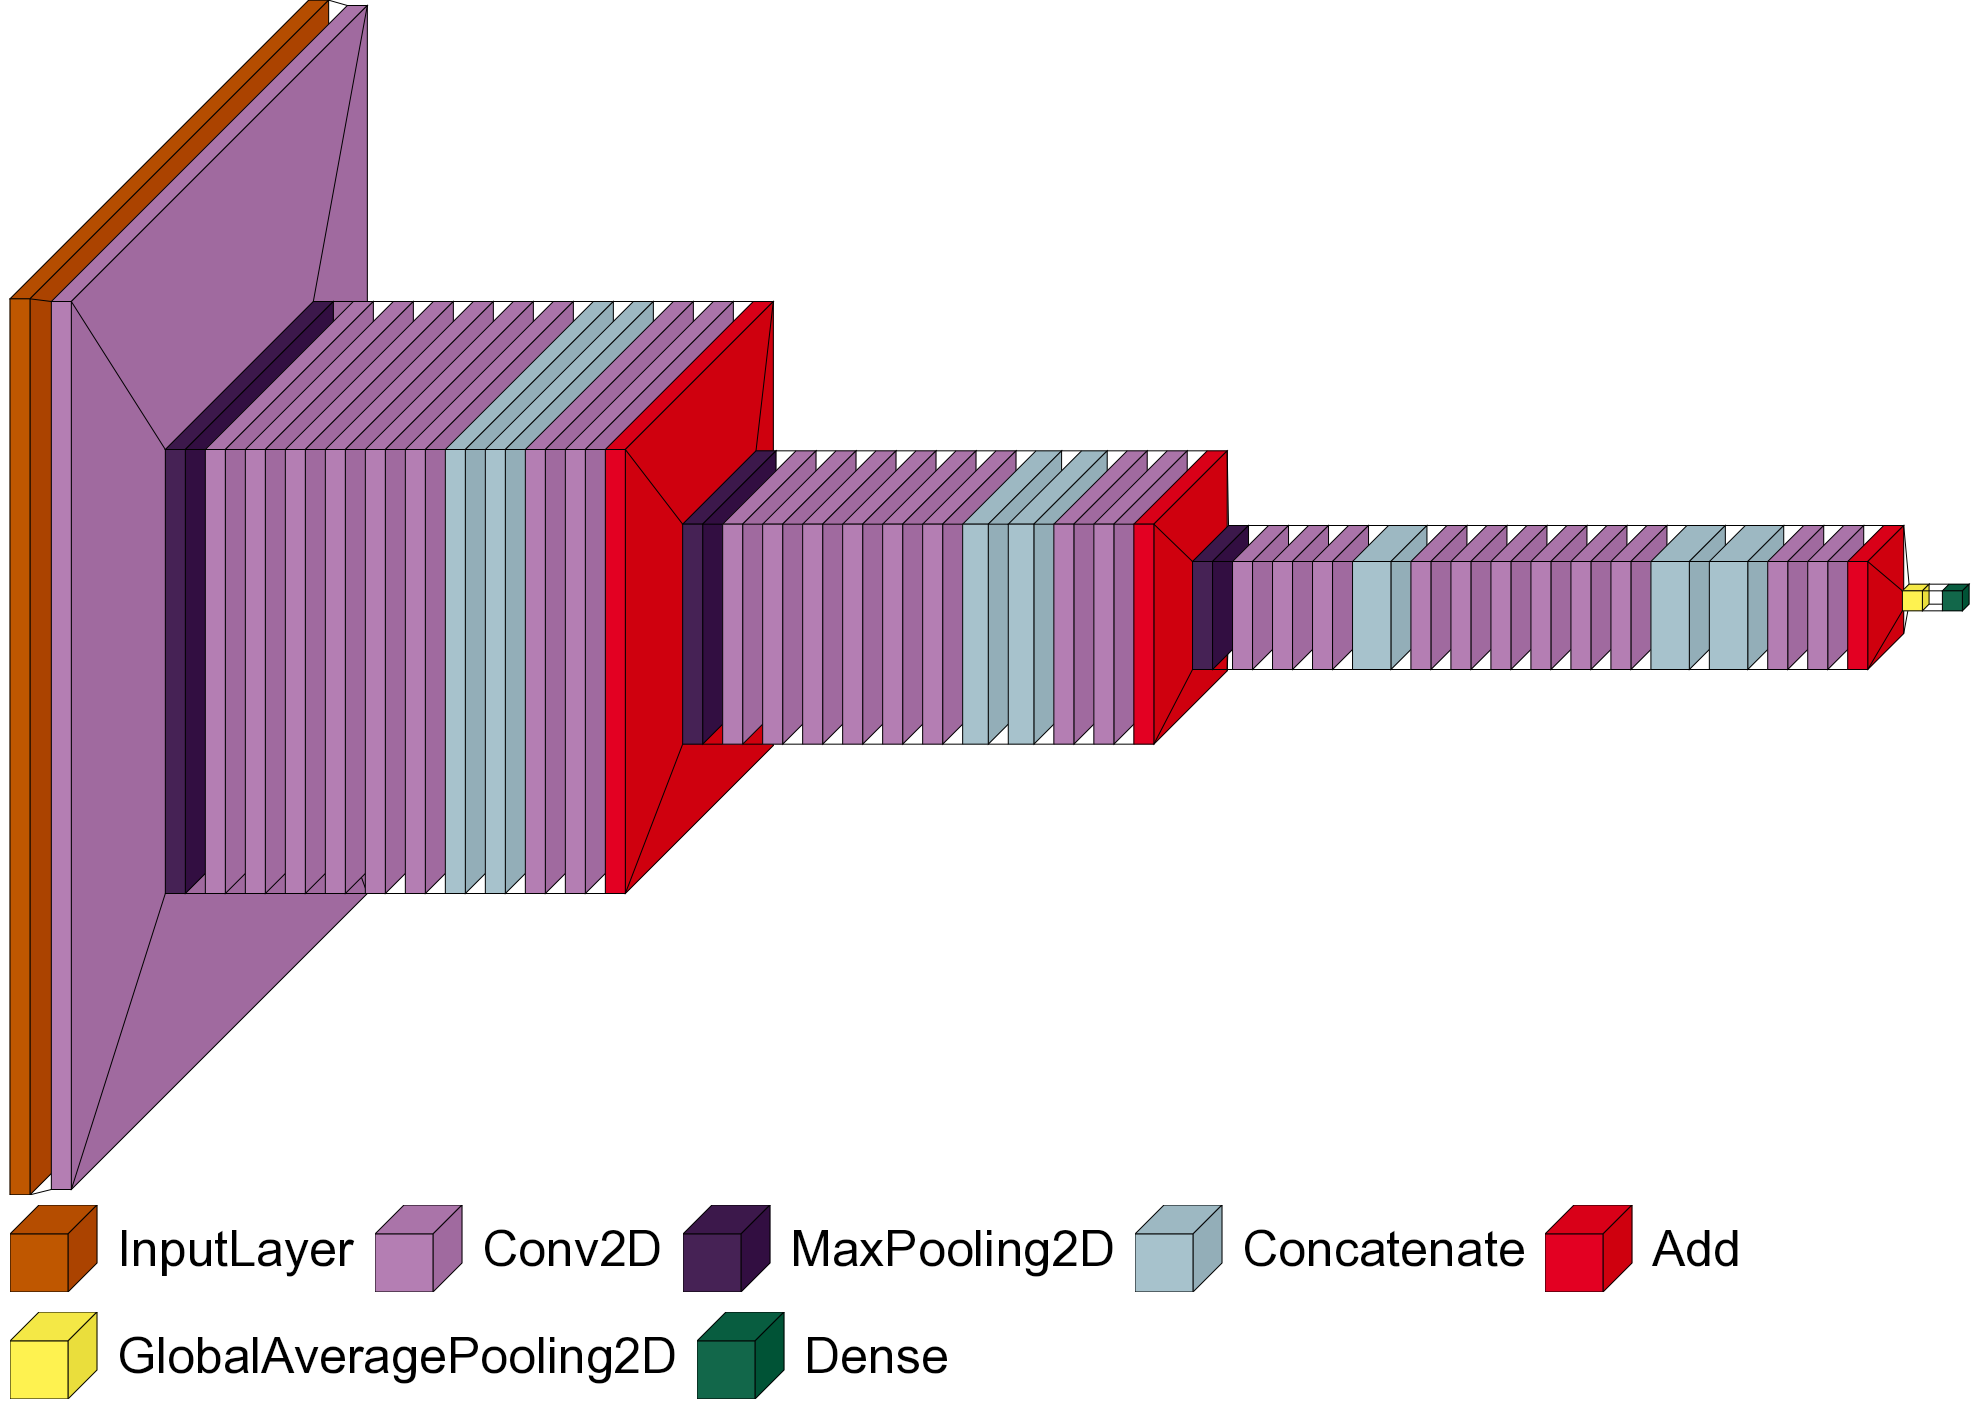

In [ ]:
import visualkeras
from PIL import ImageFont

# font = ImageFont.load_default()
font = ImageFont.truetype("ArialCE.ttf", 50)  # using comic sans is strictly prohibited!

visualkeras.layered_view(model1, legend=True,  spacing=20, font=font, color_map=color_map)